# Interpreting RCTs results

James M Brophy [](https://orcid.org/0000-0001-8049-6875) (McGill University)

**Background** Previous research has suggested a benefit for colchicine following an acute cornary syndrome. However the lastest large trial did not confirm any benefit. How to interpret these apparently conflicting results is the subect of this manuscript.

**Methods** A Bayesian workflow is presented.

#— title: “The trials of interpreting clinical trials - What to believe?” author: - name: Jay Brophy affiliation: McGill University roles: conception, analysis, writing orcid: 0000-0001-8049-6875 email: james.brophy@mcgill.ca corresponding: true date: ‘December 18, 2024’ format: html: code-fold: true code-summary: “Show the code” css: custom.scss pdf: toc: true number-sections: true latex-engine: pdflatex colorlinks: true editor: visual interactive: false bibliography: references.bib

------------------------------------------------------------------------

In [ ]:
# Set global options for chunk outputs
knitr::opts_chunk$set(
  message = FALSE,  # Hide messages
  warning = FALSE,  # Hide warnings
  echo = TRUE,      # Show code
  eval = TRUE,      # Ensure code is evaluated
  comment = NA,     # Suppress "In [1]:" or similar prompts
  results = "markup" # Ensure output is rendered as markup, not interactive ?"asis"
)

suppressPackageStartupMessages({
  library(tidyverse)
  library(posterior)
  library(brms)
  library(Rcpp)
  library(lme4)
})

## Introduction

The current evidence based medicine (EBM) paradigm places systematic reviews and meta-analyses ideally of randomized clinical trials at the top of the evidential pyramid. A much less studied, but recurring question is how to approach the situation with missing or “conflicting” evidence. While this commentary will explore various statistical approaches, it must be appreciated that these are but ancillary methods to the more crucial element of clinical judgement. Clinical judgement must precede statistical analyses in deciding what is in fact “combinable”, in an analogous manner as to why statistical significance alone can’t automatically equate to causality.

## A recent example

In the CLEAR OASIS 9 trial([1](#ref-CLEAR)) acute MI patients were randomized to colchicine (n = 3,528) or placebo (n = 3,534) immediately after percutaneous coronary intervention (PCI). The primary outcome of major adverse CV events (MACE), composite of CV death, MI, stroke, or ischemia-driven revascularization, with a median 3 year follow-up was: 9.1% vs. 9.3%, hazard ratio (HR) 0.99 (95% confidence interval \[CI\] 0.85-1.16, p = 0.93). Also none of the prespecified clinical secondary outcomes reached clinical significance. Given the high quality of the study design and its execution combined with the large number of primary-outcome events (649), the authors reasoned that the chance of a spurious result was low. Thus, they concluded “Among patients who had myocardial infarction, treatment with colchicine, when started soon after myocardial infarction and continued for a median of 3 years, did not reduce the incidence of the composite primary outcome.”  
<br> The CLEAR authors acknowledge that the most comparable previous study was COLCOT([2](#ref-RN33)), a randomized colchicine trial involving 4745 patients who received colchicine at a dose of 0.5 mg daily (n=2366) or placebo within 30 days of an acute myocardial infarction and were followed for a median of 22.6 months. The composite primary outcome was a composite (cardiovascular deaths, recurrent myocardial infarction, resuscitation after cardiac arrest, stroke, or urgent hospitalization for angina that led to revascularization), similar to CLEAR. This trial had a total of 301 primary-outcome events, and colchicine treatment was associated with a 23% relative reduction (hazard ratio, 0.77; 95% confidence interval \[CI\], 0.61 to 0.96; P = 0.02). In the CLEAR discussion, there was no attempt to explain these “differences” other than observing that two other recent colchicine trials in stroke patients\[([3](#ref-RN52))\]([4](#ref-RN53)) also showed no benefit with colchicine and that CLEAR was a bigger trial, presumably with improved precision of the treatment effect.  
<br> What then should the average clinician now believe? Should they adopt the implicit CLEAR investigators’ view that since their trial is larger it should be believed and that the evidence from the 4745 COLCOT patients should be forgotten or ignored. The CLEAR PI was more explicit in an interview following the oral presentation of these findings stating that before CLEAR “I was a believer in colchicine,” (implictly because of COLCOT(?), although this belief presumably wasn’t universally shared or the necessary equipoise would not have been present to proceed with the CLEAR trial) but not after CLEAR “I decided to stop it in my parent”([5](#ref-RN7043)). This dichotomization of beliefs is common, undoubtedly influenced by the null hypothesis significance testing paradigm and the conventional p value 0.05 threshold for medical research, reflecting a deterministic binary viewpoint not only for accepting or rejecting null hypotheses but also for clinical decision making.  
<br> Of course, some may eschew this approach and prefer to wait for a meta-analysis incorporating all available colchicine studies but care must be taken to assure the consistency of study design, patient populations, and outcomes. But what if there are no meta-analyses or even more disconcerting no previous trials? Is there another approach that may facilitate a more nuanced interpretation of the CLEAR study with, or without, the existence of prior knowledge?  
<br>

## The Bayesian approach

The common statistical paradigm in medical research is null hypothesis significance testing (NHST) where decisions are conditioned on the comparison of p values (P (data or more extreme \| hypothesis)[1] to prespecified type I errors. Unfortunately this approach has been repeatedly shown to favor cognitive errors\[([6](#ref-RN3836))\]([7](#ref-RN3826))([8](#ref-RN5420)). On the other hand, a Bayesian approach provides the information clinicians are actually seeking, namely the probability that the hypothesis is true given the observed data, P (hypothesis \| observed data). This posterior distribution, derived from a weighted combination of a prior belief and the current data, not only allows the incorporation of prior knowledge, when available according to the rules of probability, but also avoids the aforementioned cognitive errors.

### Vague priors

Bayesian analyses can use differing prior beliefs thereby providing an assessment of the overall robustness of the posterior conclusions. Returning to the CLEAR example, let’s adopt their viewpoint of interpreting the data independently of any prior knowledge. This involves choosing a vague prior so that the posterior probability distribution is completely dominated by the observed CLEAR data. Probability distribution are not restricted to specific point estimates but can be calculated for multiple different cutpoints or intervals. For example, one might assume that we are particularly interested in probabilities that exceed a clinically meaningful benefit or harm. These clinical cutpoints can be individually chosen but for demonstration purposes, let’s assume a benefit threshold of RR \< 0.9 and harm threshold of RR \> 1.1.

[1] Shorthand for “Probability (data or more extreme given the hypothesis)”

Running MCMC with 4 parallel chains...

Chain 1 finished in 0.0 seconds.
Chain 2 finished in 0.0 seconds.
Chain 3 finished in 0.0 seconds.
Chain 4 finished in 0.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.0 seconds.
Total execution time: 0.2 seconds.

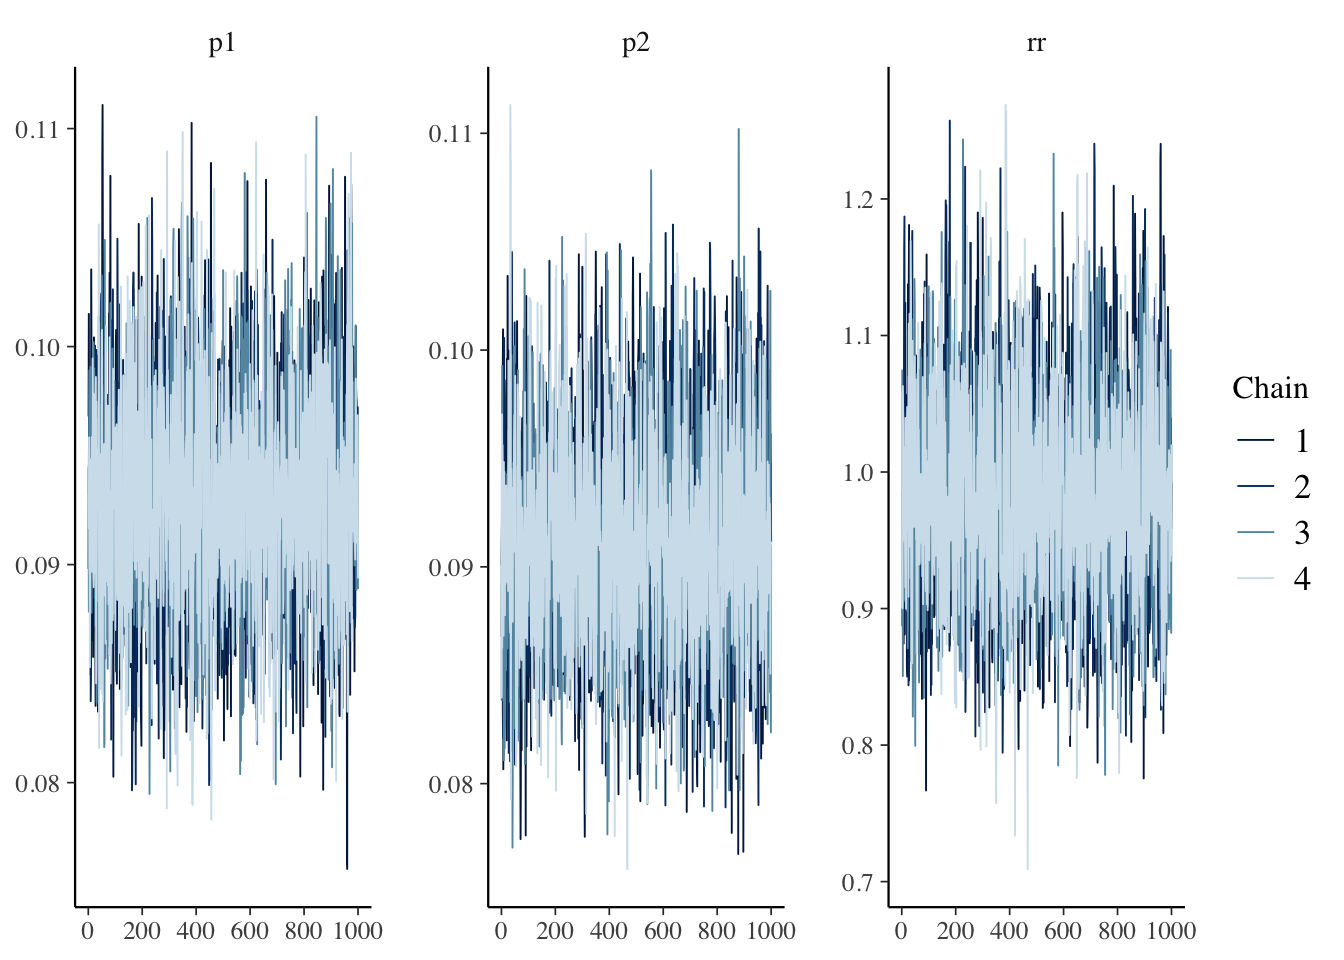

# A tibble: 4 × 10
  variable       mean    median      sd     mad       q5      q95  rhat ess_bulk
  <chr>         <dbl>     <dbl>   <dbl>   <dbl>    <dbl>    <dbl> <dbl>    <dbl>
1 lp__     -2173.      -2.17e+3 1.04    0.726   -2.18e+3 -2.17e+3  1.00    1907.
2 p1           0.0930   9.29e-2 0.00490 0.00474  8.51e-2  1.01e-1  1.00    3010.
3 p2           0.0912   9.11e-2 0.00492 0.00479  8.35e-2  9.95e-2  1.00    3217.
4 rr           0.983    9.80e-1 0.0741  0.0727   8.67e-1  1.11e+0  1.00    3183.
# ℹ 1 more variable: ess_tail <dbl>

In [ ]:
# Data for the model
data_list <- list(
  n2 = 3528,
  y2 = as.integer(3528 * 0.091),
  n1 = 3534,
  y1 = as.integer(3534 * 0.093)
)

# Compile and fit the model
mod <- cmdstan_model("binom_2.stan")
fit <- mod$sample(data = data_list, chains = 4, parallel_chains = 4,        refresh = 0, seed = 123)

Using the CLEAR data alone with vague priors, the probabilities of clinical benefit (RR \< 0.9), practical equivalence ( 0.9 \< RR \< 1.1) and harm (RR \> 1.1) are 12.38%, 81.2% and 6.42%, respectively. The probability of any benefit (RR , 1) is 60.45%. These results can also be shown graphically, where the area under the curve is proportional to each probability.

In [ ]:
# Assuming rr_vector is already defined
d <- density(rr_vector)
density_df <- data.frame(x = d$x, y = d$y)

# Assign categories based on the x values
density_df$category <- ifelse(density_df$x < 0.9, "benefit",
                              ifelse(density_df$x <= 1.1, "equivalence", "harm"))

p <- ggplot(density_df, aes(x = x, y = y)) +
  geom_area(data = subset(density_df, category == "benefit"), fill = "green", alpha = 0.5) +
  geom_area(data = subset(density_df, category == "equivalence"), fill = "yellow", alpha = 0.5) +
  geom_area(data = subset(density_df, category == "harm"), fill = "red", alpha = 0.5) +
  geom_vline(xintercept = 0.9, linetype = "dashed", color = "black") +
  geom_vline(xintercept = 1.1, linetype = "dashed", color = "black") +
  geom_vline(xintercept = 1.0, color = "blue", size=1.5) +
  labs(title="Density Plot of Relative Risk based on CLEAR OASIS",
       subtitle = "with a vague prior") +
  theme_classic() +
  scale_x_continuous(expand = c(0, 0)) +  # No expansion on x-axis
  scale_y_continuous(expand = c(0, 0)) +  # No expansion on y-axis
  xlab("Relative Risk") +
  ylab("Density")

ℹ Please use `linewidth` instead.

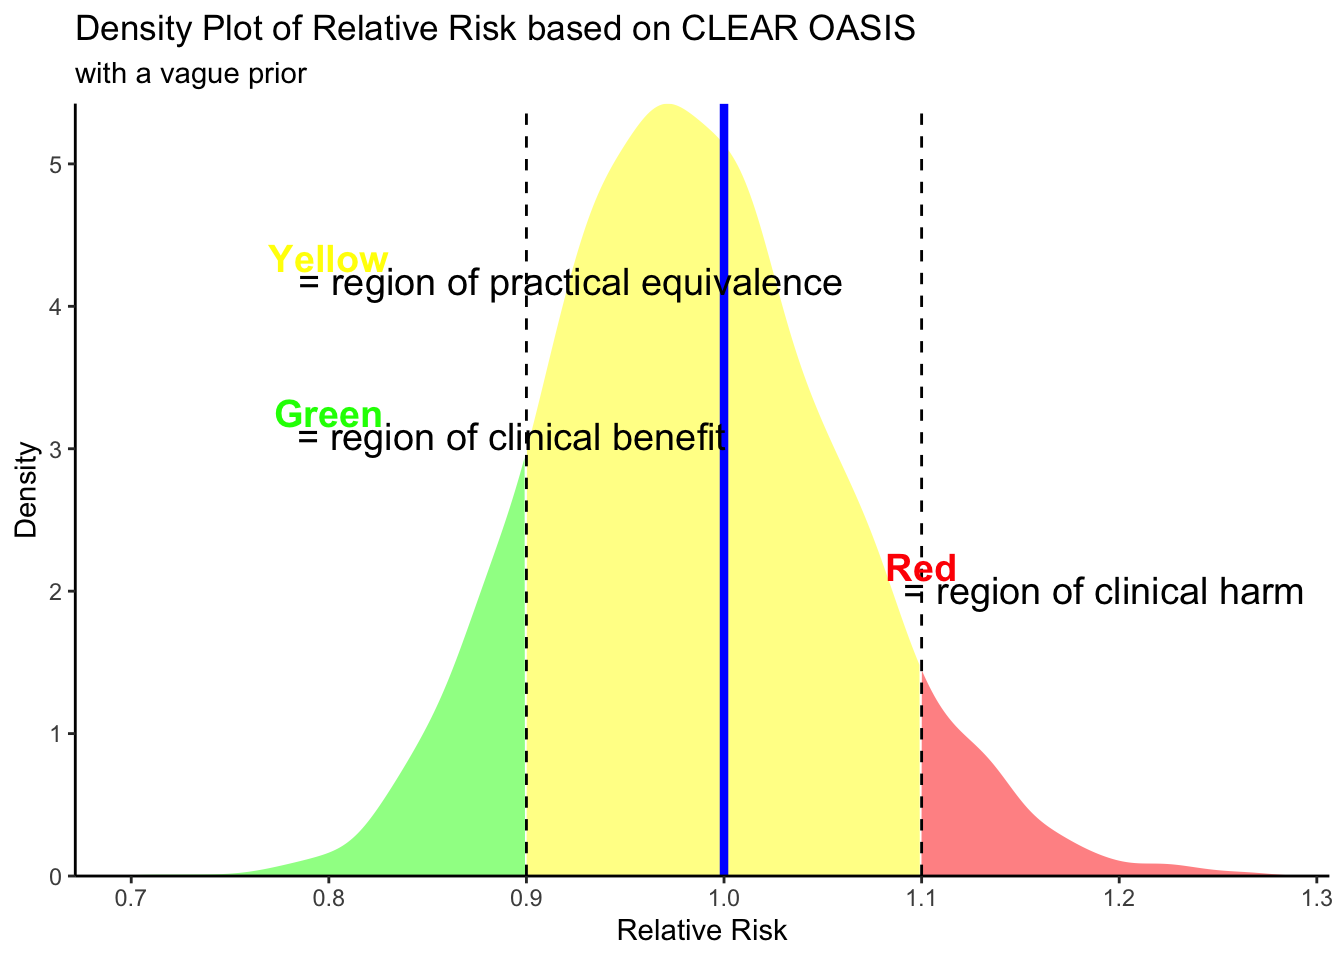

In [ ]:
p

This analysis shows a small, but not trivial probability (12.4%) of a clinically significant benefit (where this has been arbitrarily defined as a minimum 10% decrease in RR). There is a 6.4% of clinical harm (RR \>1.1) and a 81.2% probability of practical equivalence.  
<br> Recall that this analysis considers only the current CLEAR study but a 12.% probability of an at least 10% reduction in RR may be seen by some to be more consistent with the conclusion that while unlikely the possibility of a cholchicine benefit remains and that additional studies or analyses are required rather than with the published CLEAR conclusion of not reducing the incidence of the composite primary outcome.  
<br> Moreover the lead CLEAR PI claimed he was a priori a “believer” so this vague prior should be replaced with an informative prior belief that is updated with this new data. Informative priors are combined with the current data following the laws of probability, i.e. a weighted average according with weights proportional to the precision of the prior and current data.

### Informative prior

Given that CLEAR and COLCOT were both well designed, well executed trials examining the same intervention in the same study populations and published in the same esteemed medical journal, its seems absurd to completely ignore either of these studies. A more basic question then is are these two study results really different? From a substantive perspective given the same interventions in similar populations with the same measured outcome, the clinical answer appears to be that they are not different. Even from a statistical perspective the trials do not appear radically different with overlapping of the reported 95% confidence intervals for the primary outcomes. It is only each trial is assessed with the dichotomous statistical significance lens that the two trials appear different and there is no reason why this ersatz statistical heterogeneity should prevail. The error with this approach have been previously well documented with the key insight being “In making a comparison between two treatments, one should look at the statistical significance of the difference rather than the difference between their significance levels([9](#ref-RN5721)). The Bayesian statistical lens will clarify these shortcomings.

COLCOT results may also be analyzed and presented within a Bayesian framework, again with a vague prior so the results are dependent uniquely on the observed data. This may help in understanding why before CLEAR, some were “colchicine believers” and other were not.

In [ ]:
# Data for the COLCOT model
data_list1 <- list(
  n2 = 2366,
  y2 = as.integer(2366 * 0.055),
  n1 = 2379,
  y1 = as.integer(2379 * 0.071)
)

# Compile and fit the model
mod1 <- cmdstanr::cmdstan_model("binom_2.stan")
fit1 <- mod1$sample(data = data_list1, chains = 4, parallel_chains = 4,        
                   refresh = 0, seed = 123)

# Extracting posterior samples
posterior_samples1 <- fit1$draws()

# Plotting
color_scheme_set("blue")
# mcmc_trace(posterior_samples, pars = c("p1", "p2", "rr"), nrow = 3)

# Plot relative risk distributions with no formatting
# mcmc_areas(posterior_samples, pars = "rr", prob = 0.95)

# print summary
fit1$summary()

# Correct extraction of relative risk samples
rr_samples1 <- fit1$draws(variables = "rr")
rr_vector1 <- as.vector(rr_samples1)  # Convert to a simple vector for easier handling

# Calculating probabilities
prob_rr_less_09 <- mean(rr_vector1 < 0.9)
prob_rr_between_09_11 <- mean(rr_vector1 >= 0.9 & rr_vector1 <= 1.1)
prob_rr_greater_11 <- mean(rr_vector1 > 1.1)
prob_rr_less_08 <- mean(rr_vector1 < 0.8)
prob_rr_less_10 <- mean(rr_vector1 < 1.0)

options(digits=2)
# Print the probabilities
# cat("Probability RR < 1.0 (P (statistical signifiance)): ", prob_rr_less_10, 
#   "\nProbability RR < 0.8: ", prob_rr_less_08, 
#   "\nProbability RR < 0.9: ", prob_rr_less_09,
#   "\nProbability RR 0.9 to 1.1: ", prob_rr_between_09_11, 
#   "\nProbability RR > 1.1: ", prob_rr_greater_11, "\n")

For COLCOT, the probabilities of clinical benefit (RR \< 0.9), practical equivalence ( 0.9 \< RR \< 1.1) and harm (RR \> 1.1) are 89.98%, 9.85% and 0.18%, respectively. Again this can be shown graphically. Incidentally we can also calculate the probability of a clinical benefit exceeding a 20% reduction, 59.85%, as well as the probability of any benefit, 98.65%. Again these results may be dosplayed graphically where the area under the curve is proportional to each probability.

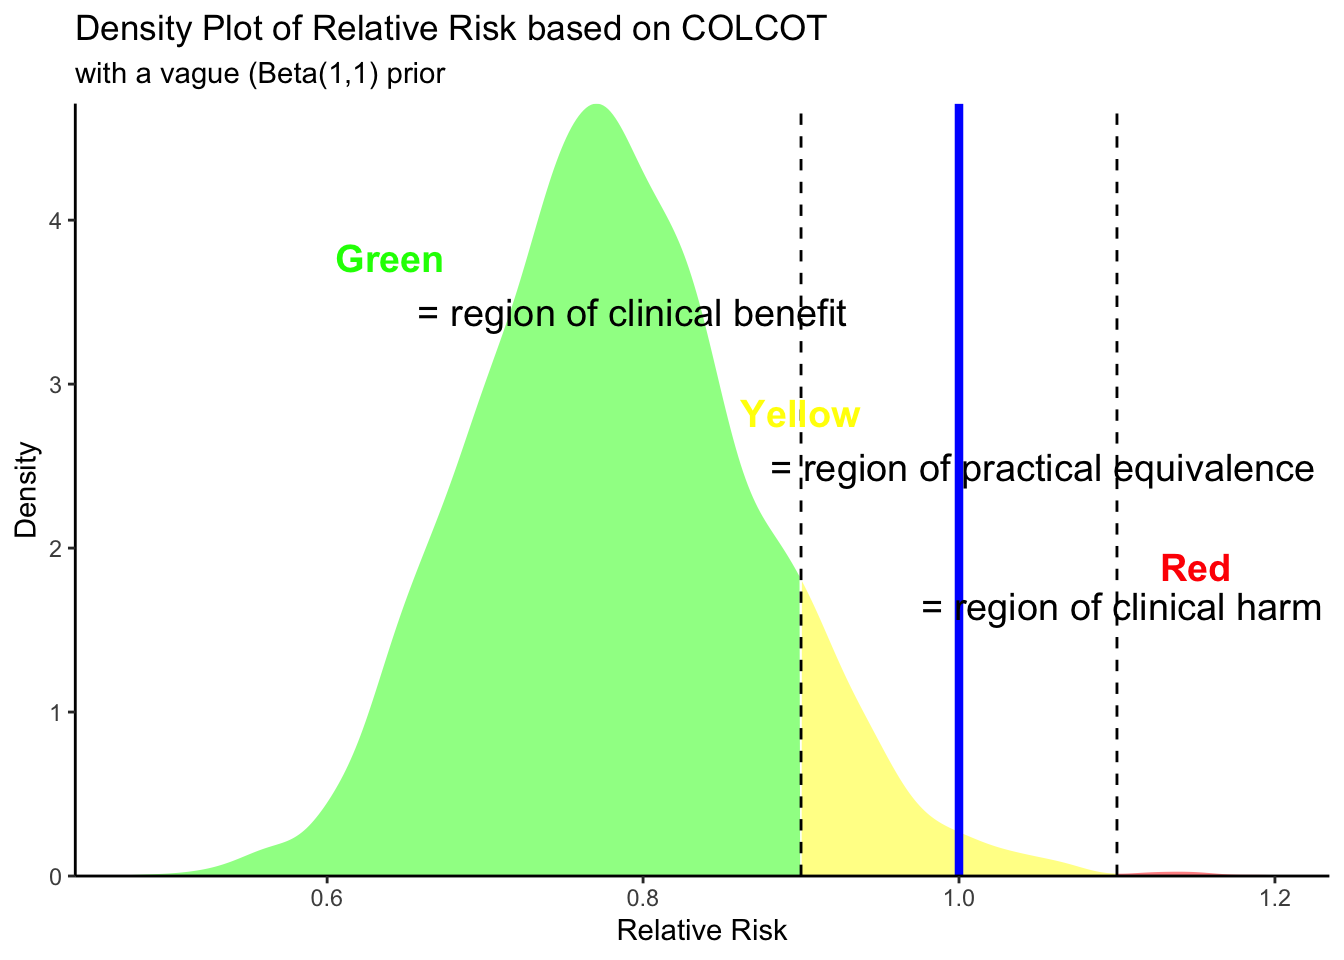

In [ ]:
# Assuming rr_vector is already defined
d <- density(rr_vector1)
density_df <- data.frame(x = d$x, y = d$y)

# Assign categories based on the x values
density_df$category <- ifelse(density_df$x < 0.9, "benefit",
                              ifelse(density_df$x <= 1.1, "equivalence", "harm"))

p <- ggplot(density_df, aes(x = x, y = y)) +
  geom_area(data = subset(density_df, category == "benefit"), fill = "green", alpha = 0.5) +
  geom_area(data = subset(density_df, category == "equivalence"), fill = "yellow", alpha = 0.5) +
  geom_area(data = subset(density_df, category == "harm"), fill = "red", alpha = 0.5) +
  geom_vline(xintercept = 0.9, linetype = "dashed", color = "black") +
  geom_vline(xintercept = 1.1, linetype = "dashed", color = "black") +
  geom_vline(xintercept = 1.0, color = "blue", size=1.5) +
  labs(title="Density Plot of Relative Risk based on COLCOT",
       subtitle = "with a vague (Beta(1,1) prior") +
  theme_classic() +
  scale_x_continuous(expand = c(0, 0)) +  # No expansion on x-axis
  scale_y_continuous(expand = c(0, 0)) +  # No expansion on y-axis
  xlab("Relative Risk") +
  ylab("Density")

p <- p + 
  annotate("text", x = 0.64, y = max(density_df$y, na.rm = TRUE) * 0.8, label = "Green", color = "green", size = 5, fontface = "bold") +
  annotate("text", x = 0.79, y = max(density_df$y, na.rm = TRUE) * 0.73, label = " = region of clinical benefit", color = "black", size = 5) +
  annotate("text", x = 0.9, y = max(density_df$y, na.rm = TRUE) * 0.6, label = "Yellow", color = "yellow", size = 5, fontface = "bold") +
  annotate("text", x = 1.05, y = max(density_df$y, na.rm = TRUE) * 0.53, label = " = region of practical equivalence", color = "black", size = 5) +
  annotate("text", x = 1.15, y = max(density_df$y, na.rm = TRUE) * 0.4, label = "Red", color = "red", size = 5, fontface = "bold") +
  annotate("text", x = 1.10, y = max(density_df$y, na.rm = TRUE) * 0.35, label = " = region of clinical harm", color = "black", size = 5)

p

This figure explains possible different beliefs about the colchicine effect following COLCOT but before CLEAR. Some will be enthusiastic about a 90% probability of a clinical benefit (assuming a 10% reduction in RR is an appropriate clinical threshold). Those willing to accept this benefit threshold might classify themselves initially as “colchicine believers”.Conversely others may be more conservative and want a larger reduction in RR, given the inconvenience, cost, and possible side effects of another medication. The probability of an at least 20% reduction is only 60%, not much better than a coin toss, underscoring their desire to perhaps wait for and even participate in, further studies (CLEAR) to better define any clinical benefits.  
<br> Accepting for the moment the validity of both trials, what should one now believe after CLEAR, if their prior belief had been determined by the COLCOT data. Here we simply repeat the Bayesian analysis but instead of a vague prior we use the COLCOT data.

Running MCMC with 4 parallel chains...

Chain 1 finished in 0.0 seconds.
Chain 2 finished in 0.0 seconds.
Chain 3 finished in 0.0 seconds.
Chain 4 finished in 0.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.0 seconds.
Total execution time: 0.2 seconds.

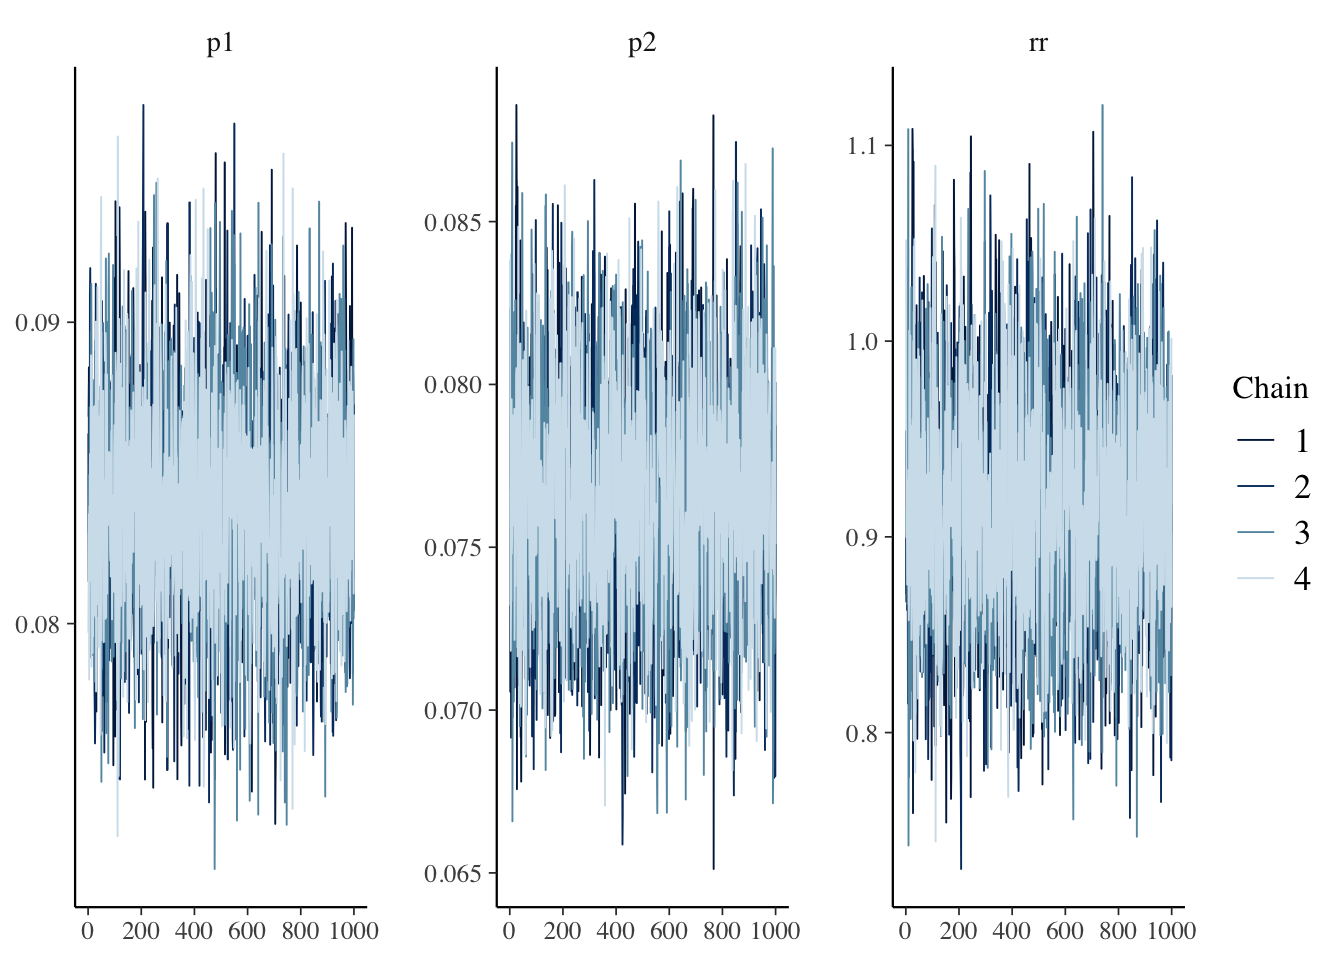

# A tibble: 4 × 10
  variable       mean    median      sd     mad       q5      q95  rhat ess_bulk
  <chr>         <dbl>     <dbl>   <dbl>   <dbl>    <dbl>    <dbl> <dbl>    <dbl>
1 lp__     -3297.      -3.30e+3 0.980   0.667   -3.30e+3 -3.30e+3  1.00    1915.
2 p1           0.0839   8.38e-2 0.00355 0.00348  7.81e-2  8.97e-2  1.00    3516.
3 p2           0.0765   7.65e-2 0.00343 0.00349  7.09e-2  8.23e-2  1.00    3237.
4 rr           0.914    9.13e-1 0.0567  0.0576   8.23e-1  1.01e+0  1.00    3281.
# ℹ 1 more variable: ess_tail <dbl>

Probability RR < 0.9:  0.41 
Probability RR 0.9 to 1.1:  0.59 
Probability RR > 1.1:  0.0013 

In [ ]:
# prior from COLCOT

alpha1 = as.integer(2379 * 0.071)
beta1 <- 2379 - alpha1
alpha2 = as.integer(2366 * 0.055)
beta2 <- 2366 - alpha2

# Data for the model
data_list <- list(
  n1 = 3534,
  y1 = as.integer(3534 * 0.093),
  n2 = 3528,
  y2 = as.integer(3528 * 0.091),
  alpha1 = alpha1,
  beta1 = beta1,
  alpha2 = alpha2,
  beta2 = beta2
)


# Compile and fit the model
mod <- cmdstan_model("binom_2_priorCOLCOT.stan")
fit <- mod$sample(data = data_list, chains = 4, parallel_chains = 4,        
                  refresh = 0, seed = 123)

Understanding these results is facilitated with graphical presentations where it is noted that this posterior distribution with the COLOT informative prior is a weighted average between the COLCOT probability distributions and the CLEAR likelihood distirbution.

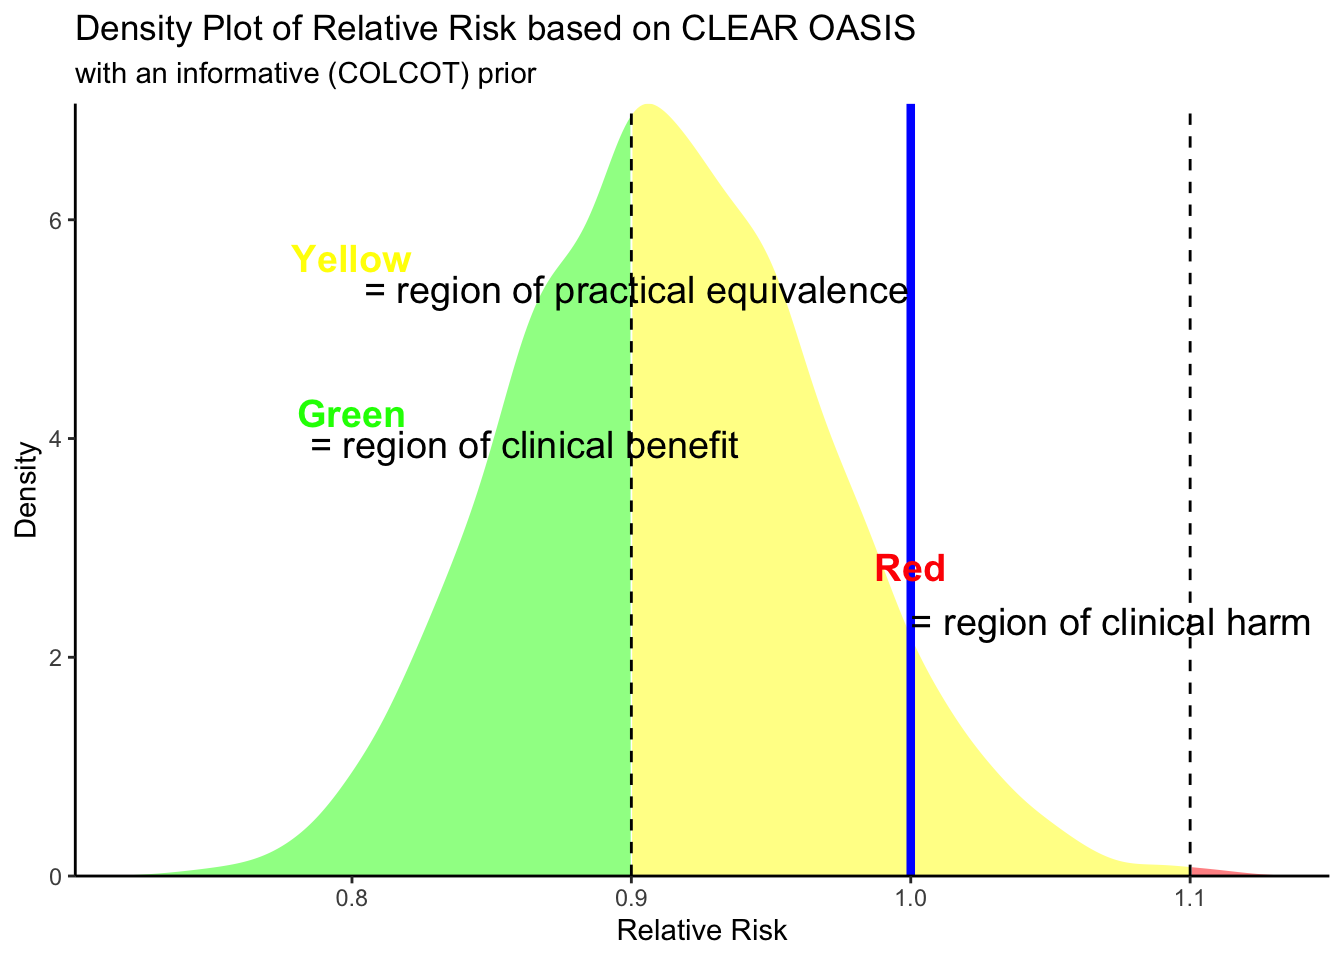

In [ ]:
# Assuming rr_vector is already defined
d <- density(rr_vector)
density_df <- data.frame(x = d$x, y = d$y)

# Assign categories based on the x values
density_df$category <- ifelse(density_df$x < 0.9, "benefit",
                              ifelse(density_df$x <= 1.1, "equivalence", "harm"))

p <- ggplot(density_df, aes(x = x, y = y)) +
  geom_area(data = subset(density_df, category == "benefit"), fill = "green", alpha = 0.5) +
  geom_area(data = subset(density_df, category == "equivalence"), fill = "yellow", alpha = 0.5) +
  geom_area(data = subset(density_df, category == "harm"), fill = "red", alpha = 0.5) +
  geom_vline(xintercept = 0.9, linetype = "dashed", color = "black") +
  geom_vline(xintercept = 1.1, linetype = "dashed", color = "black") +
  geom_vline(xintercept = 1.0, color = "blue", size=1.5) +
  labs(title="Density Plot of Relative Risk based on CLEAR OASIS",
       subtitle = "with an informative (COLCOT) prior") +
  theme_classic() +
  scale_x_continuous(expand = c(0, 0)) +  # No expansion on x-axis
  scale_y_continuous(expand = c(0, 0)) +  # No expansion on y-axis
  xlab("Relative Risk") +
  ylab("Density")

p <- p + 
  annotate("text", x = 0.80, y = max(density_df$y, na.rm = TRUE) * 0.6, label = "Green", color = "green", size = 5, fontface = "bold") +
  annotate("text", x = 0.86, y = max(density_df$y, na.rm = TRUE) * 0.56, label = " = region of clinical benefit", color = "black", size = 5) +
  annotate("text", x = 0.8, y = max(density_df$y, na.rm = TRUE) * 0.8, label = "Yellow", color = "yellow", size = 5, fontface = "bold") +
  annotate("text", x = .90, y = max(density_df$y, na.rm = TRUE) * 0.76, label = " = region of practical equivalence", color = "black", size = 5) +
  annotate("text", x = 1.00, y = max(density_df$y, na.rm = TRUE) * 0.4, label = "Red", color = "red", size = 5, fontface = "bold") +
  annotate("text", x = 1.07, y = max(density_df$y, na.rm = TRUE) * 0.33, label = " = region of clinical harm", color = "black", size = 5)

p

Let’s return to the CLEAR PI who was a “believer” prior to his study but not after seeing the CLEAR data. If the COLCOT RCT results were responsible for his positive prior beliefs, this analyse suggests after CLEAR there remains a 40.9% probability of a clinically meaningful decrease in CV risk with colchicine, a 58.98% probability of clinical equivalence with placebo and virtually no chance of a clinically meaningful increase in cardiovascular outcomes.  
<br> Of course, if a clinician had an clinical cutpoint for efficacy of RR \< 0.80 then it does indeed seem reasonable, based on the totality of the evidence to be a “non-believer” as the probability of decreased cardiovascular outomces is less than 1.77%. However this would imply that their prior efficacy belief should also be referenced to a probability of RR \< 0.80 which for COLCOT was only 60%. This seems a fairly modest probability to have been a strong “believer” in this therapy before the current study.  
<br> This demonstrates that an intuitive reconciliation of prior and posterior beliefs can be difficult and is not helped by dichotomization. Moreover, clinicians may be overly influenced by the last trial, particularly if they were intimately involved in it. The probabilistically correct harmonization of all avalaible evidence can only be assured with a Bayesian analysis, avoiding these cognitive issues.  

### Bayesian Meta-analysis

This updating of prior beiliefs has an advantage of being temporally consistent with the availability of the data and mirrors human sequential learning. Very similar results can be reached when a Bayesian random effects (hierarchical) meta-analysis is performed in the case where data temporality is not a factor. Hierarchical models represent a compromise between complete pooling (fixed effect) or no pooling if the studies are considered completely independent. Individual studies are treated as part of a larger population of studies and allows for “shrinkage”, where estimates for individual studies are partially “pulled” toward the overall mean effect across studies.  
<br>For the colchicine example, this model accounts for both within and between study variability producing pooled mean estimates that integrate information from both studies while acknowledging that study effects might vary. This model also can provide the predictive interval for the next study from the super population of possible studies. As with the preceding analyses, in the Bayesian paradigm all parameters require an initial priors. In this case, a prior is required for the mean estimate and the population variation and you have assumed vague priors with a range between 0.14 to 7.4 (N(0,1) on the log scale). The results of this meta-analysis are displayed in the following figure

In [ ]:
# hierarchical meta-analytical data prep and plot using brms package
# slightly more informative priors N(0,1) than the default priors
library(tidybayes); library(brms); library(posterior); library(tidyverse)

# data prep
total <- matrix(c(322, (3528-322), 327, (3534-327)), nrow = 2, byrow = TRUE, dimnames = list(c("colchicine", "placebo"), c("Event", "No event")))
epiR::epi.2by2(dat = as.table(total), method = "cohort.count", conf.level = 0.95, units = 100, outcome = "as.columns")

col_df <- data.frame(study=c("CLEAR", "COLCOT"), n_col=c(3528,2366), e_col=c(322,130), n_ctl=c(3534,2379), e_ctl=c(327,169))
dat <- metafor::escalc(measure="RR", ai=e_col, n1i = n_col, ci=e_ctl,  n2i =n_ctl, data=col_df)

# standard (non-bayesian) random effects model
library(metafor)
me.fe <- rma(dat$yi, sei=sqrt(dat$vi), method = "FE") # exponentiation c(exp(me.fe$b), exp(me.fe$ci.lb), exp(me.fe$ci.ub))
me.re <- rma(dat$yi, sei=sqrt(dat$vi), method = "REML") # exponentiation c(exp(me.re$b), exp(me.re$ci.lb), exp(me.re$ci.ub))
plot_Plato <- meta::metabin(col_df$e_col, col_df$n_col, col_df$e_ctl, col_df$n_ctl, sm="RR", method ="I", studlab=dat$Region, prediction=TRUE, comb.random =TRUE)
print(summary(plot_Plato,prediction=TRUE), digits=2)

meta::forest(plot_Plato, studlab = col_df$study)

# Time to go bayesian
# Specify priors for mu and tau (could also ignore and use brms defaults,  set_prior("normal(0,10)", class = "sd"))
prior <- c(
  set_prior("normal(0, 1)", class = "Intercept"),      # Matches Stan's prior for mu
  set_prior("normal(0, 1)", class = "sd")             # Matches Stan's prior for tau
)

# Fit the model with custom priors
brm_out <- brm(
  yi | se(sqrt(vi)) ~ 1 + (1|study), 
  data = dat, 
  iter = 20000, warmup = 2000, cores = 4, refresh = 0,
  control = list(adapt_delta = 0.99), # Improve convergence
  prior = prior,                     # Apply the custom priors
  seed = 123
)

summary(brm_out)


# Extract posterior samples as_draws() is another option
post <- brm_out %>%
  spread_draws(b_Intercept, r_study[study,]) %>%  # variables(brm_out)
  median_qi(condition_mean = b_Intercept + r_study, .width = c(.95)) %>% 
  rename(lower = .lower, rr = condition_mean, upper = .upper) %>% 
  select(study, rr, lower, upper) # Keep relevant columns for study-level output

post[,c(2:4)] <- apply(post[,c(2:4)],2,exp) # change from log(OR) to OR

# Extract posterior draws with posterior package and as_draws_df
draws <- as_draws_df(brm_out)  # variables(draws) to get names

# Mean and 95% CI for the mean effect
mean_intercept <- mean(draws$b_Intercept) # Mean effect (Intercept)
ci_intercept <- quantile(draws$b_Intercept, probs = c(0.025, 0.975)) # Between-study standard deviation
sigma <- draws$sigma                       # Residual standard deviation

# Transform to OR scale
mean_or <- exp(mean_intercept)
ci_or <- exp(ci_intercept)

# Simulate predicted values for the next study (log scale)
predicted_values <- rnorm(n = length(draws$b_Intercept), mean = mean_intercept,
                          sd = sqrt(draws$sd_study__Intercept^2 + sigma^2)
)
predicted_ci <- quantile(predicted_values, probs = c(0.025, 0.975))

# Transform predicted values to OR scale
predicted_mean_or <- exp(mean(predicted_values))
predicted_ci_or <- exp(predicted_ci)


#########

dat <- dat %>% 
  mutate(rr=yi, upper= yi +1.96*sqrt(vi), lower= yi - 1.96*sqrt(vi)) %>% 
  select(study,rr,lower,upper)
dat[,c(2:4)] <- apply(dat[,c(2:4)],2,exp)


post <- rbind(post, dat)

post$lab <- rep(c("Theta", "Y"), each = 2)
post$id <- c(1,2,1,2)

# Create the data frame with desired structure for hierarchical plotting
# Add overall mean and next study
results_df <- tibble(
  study = c("Mean", "Predicted Next Study"),
  lower = c(ci_or[1], predicted_ci_or[1]),
  rr = c(mean_or, predicted_mean_or),
  upper = c(ci_or[2], predicted_ci_or[2])
)
results_df$lab <- c("Mean", "Next")
results_df$id <- c(3,4)

post <- rbind(post, results_df)

g1 <- ggplot(post, aes(x = forcats::fct_rev(study), y = rr, ymin = lower, ymax = upper, col = lab)) +  
  geom_pointrange(aes(col = lab), position = position_dodge(width = 0.50)) +
  coord_flip() + geom_hline(aes(yintercept = 0.895), lty = 2) +  xlab("") + 
  ylab("")  + theme(legend.position="bottom") + geom_hline(aes(yintercept = 1), lty = 1) +
  scale_colour_discrete(name="", 
                        labels = c("Theta" = bquote("Random effect \n(hierarchical \"shrinking\"):"~exp(theta[J])~" "),
                                   "Y"= bquote("Relative risk \n(observed data):"~exp(Y[J])))) +
  labs(title = "Bayesian forest plot of cholcicine trials",
       subtitle = "Observed and hierarchical individual trial results",
       caption = "Prior tau = normal(0, 1.0)
\nMean prior = normal(0, 1.0) |") +
  theme_bw()

ggsave(g1,"output/brms_hier.png", dpi = 600, width = 8)

########## Reproduce same table as from Stan
# Summarize study-level estimates

# Extract and summarize overall mu
mu_values <- brm_out %>% spread_draws(b_Intercept) %>% pull(b_Intercept)
overall_mu <- tibble(study = "Overall (mu)", rr = mean(mu_values, na.rm = TRUE),
                     lower = quantile(mu_values, 0.025, na.rm = TRUE),
                     upper = quantile(mu_values, 0.975, na.rm = TRUE))

# Extract and summarize overall tau
tau_values <- brm_out %>% spread_draws(sd_study__Intercept) %>% pull(sd_study__Intercept)
overall_tau <- tibble(study = "Overall (tau)", rr = mean(tau_values, na.rm = TRUE),
                      lower = quantile(tau_values, 0.025, na.rm = TRUE),
                      upper = quantile(tau_values, 0.975, na.rm = TRUE))

# Combine all summaries
options(digits = 3)
temp <- post[c(1:2),c(1:4)]
temp[,c(2:4)] <- apply(temp[,c(2:4)],2,log) 
overall_post <- bind_rows(temp, overall_mu, overall_tau)
overall_post

# probability of > 10% reduction, log(.9) = -0.11
# mean sd = (.653 + .860)/3.92 = 0.386
# pnorm(-.11, -.111, .39) = 0.51 or more precisely
# pnorm(.9, 0.896, 0.382) = 0.504 from post (1.921-.423)/3.92 = 0.382

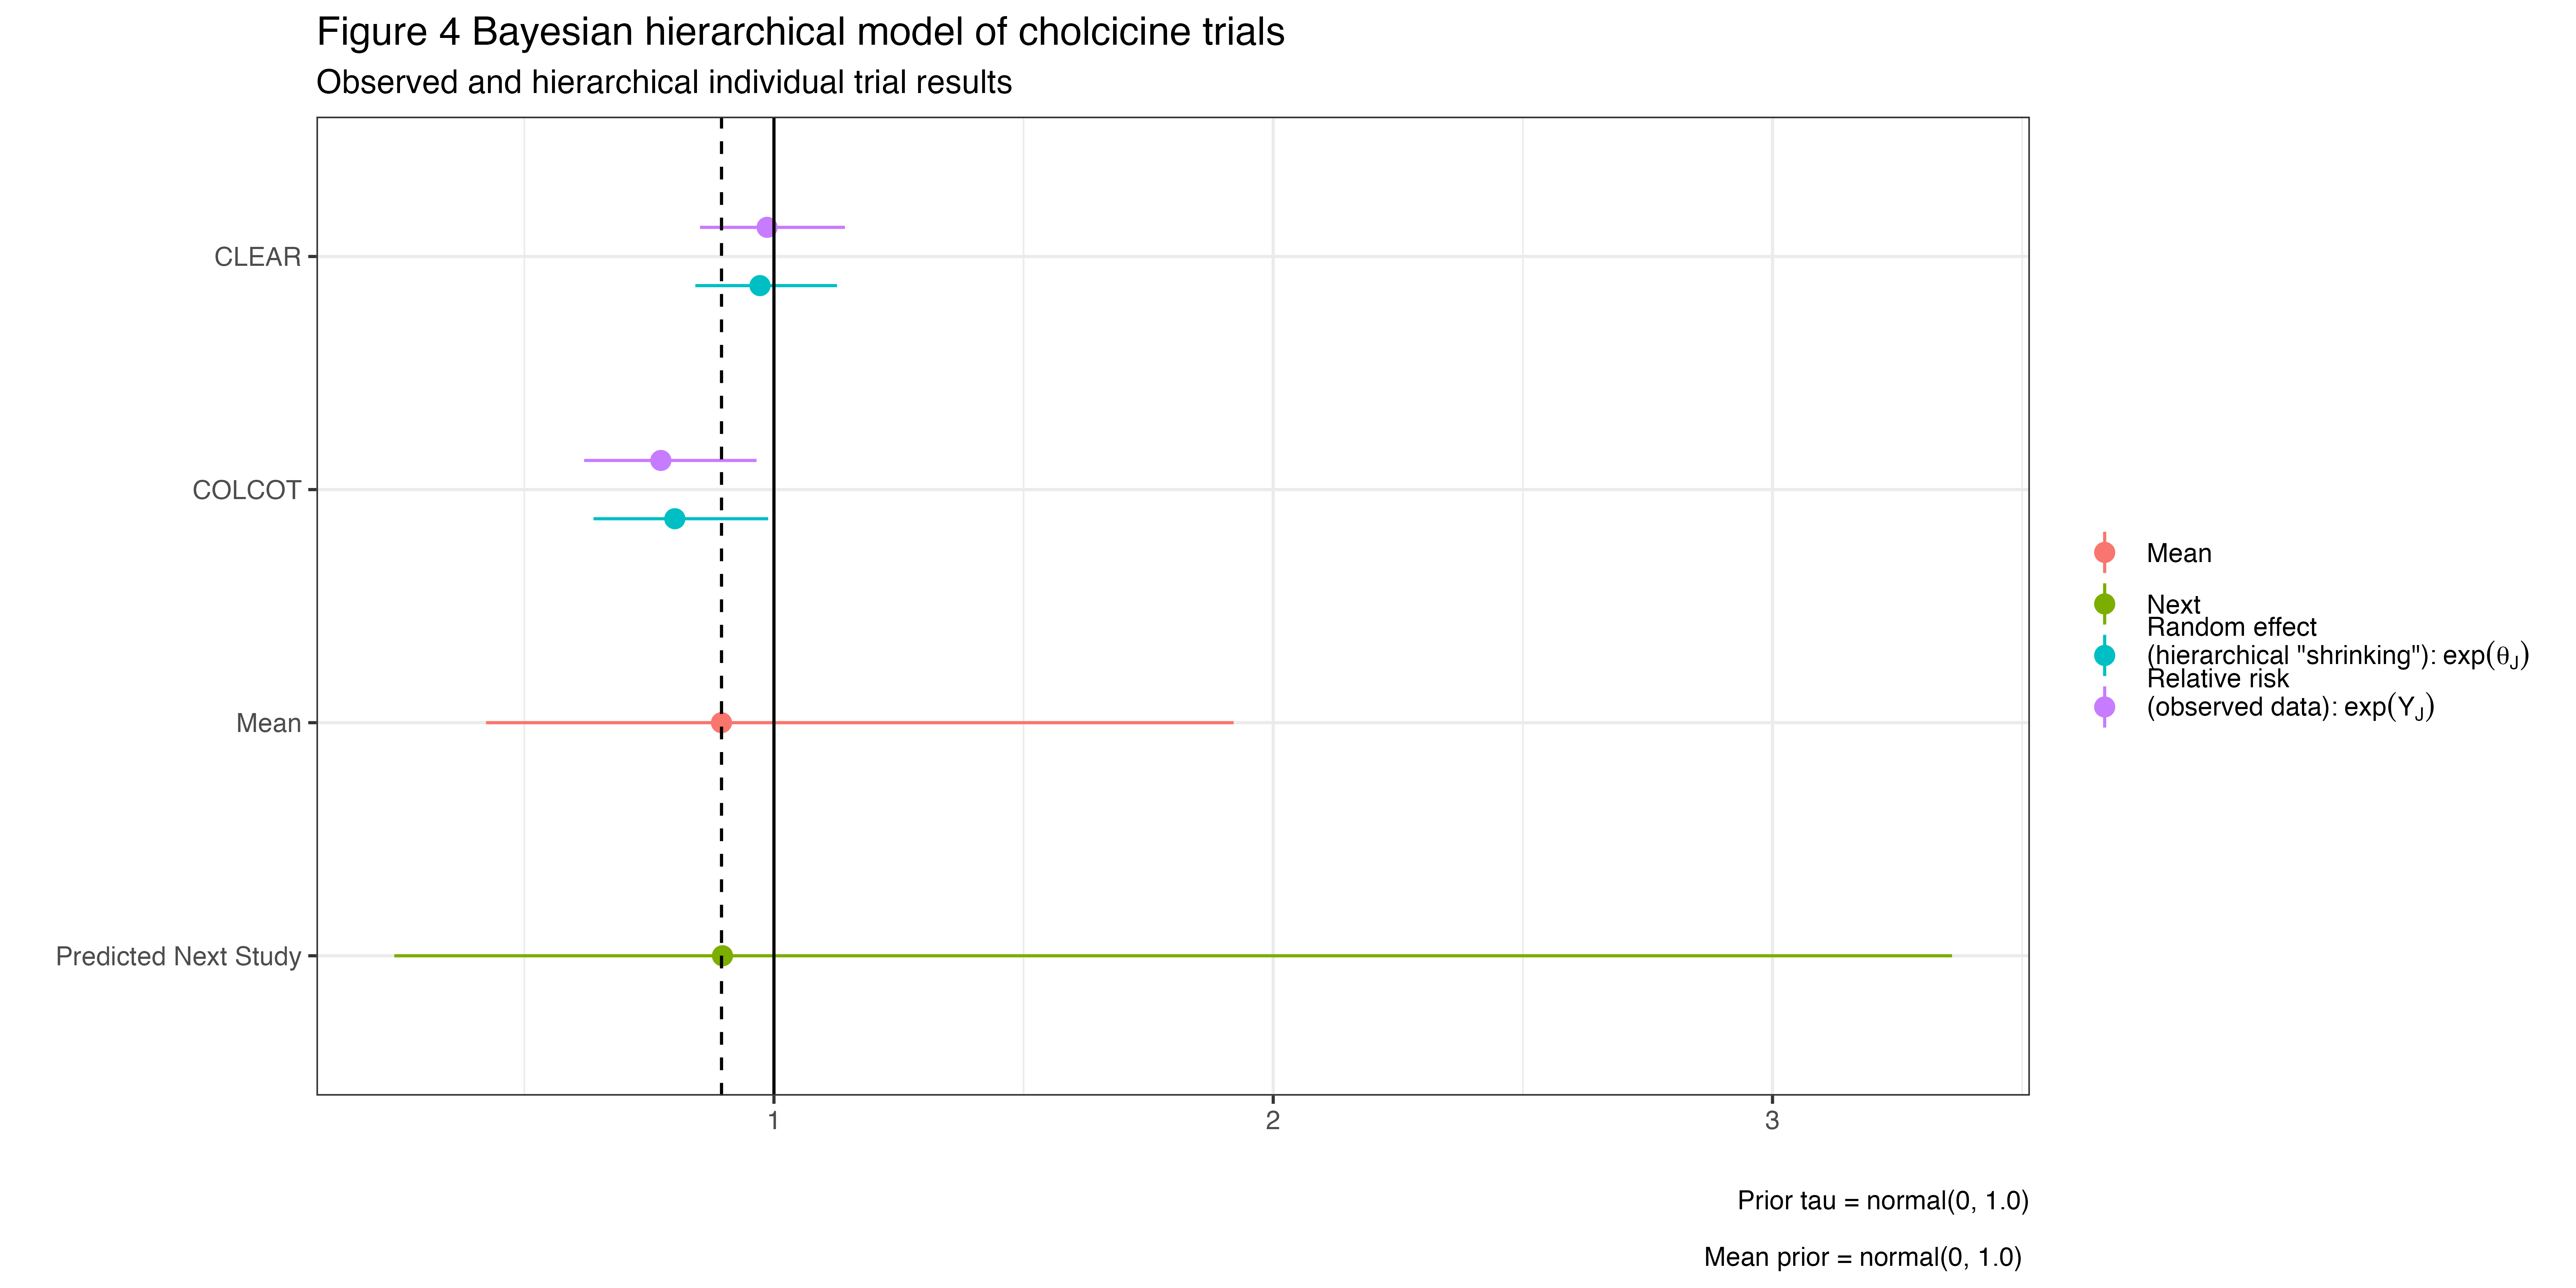 The figure demonstrates several key points;  
1. there is shrinkage of each observed trial result towards the global mean  
2. the overall mean is represented by a normal(0.896, 0.386) which gives a 50% probability of a colchicine benefit exceeding a 10% reduction in CV outcomes  
3. the probability result is, as expected, virtually identical to that obtained from the sequential Bayesian approach above.

### A meta-analysis with a single trial

While random effects meta-analyses account for both within study and between study variability, a questions arises as to how to proceed if there is only one study? A paradoxical situation arises if the unmeasured between study uncertainty a sinlge trial is ignored whereby with less evidence better precision in estimating the mean population effect is observed, than when more evidence in the form of multiple studies are available.  
<br> Compared to naively ignoring this between study variation, a recent study showed an empirical Bayes approach using as a prior the distribution of treatment effects and heterogeneity from 1,636 meta-analyses in the Cochrane Database of Systematic Reviews (CDSR) showed important reductions in the mean squared error both for estimating the study-level and population-level effects equivalent to more than doubling the isolated study sample size.([10](#ref-RN7045))  
In the CLEAR example, this novel approach gives essentially the same probabilities as the previous analysis with vague priors as the CLEAR data set is quite large over riding both the vaue and empirical priors.

## Conclusion

Clinicians are often faced with “conflicting” trial evidence. However if the trials are of equal high quality, it is important to first appreciate that these conflicts are often illusory arising from the incorrect comparisons of statistical significance. Systematic reviews and meta-analyses of prior evidence is now often demanded by funders before consideration of funding. Yet there is no similar request for a synthesis of the evidence after a trial is compeleted. Rather current incentives favor that each trial is interpreted individually. However, as demonstrated by the recent colchicine trials, this approach can lead to a flip flopping of beliefs that do not approach the current true state of knowledge. Bayesian techniques can address these issues by allowing the incorportation of past evidence and properly accounting for associated unceertainties thereby raising the quality of clinical trial interpretations

<span class="csl-left-margin">1. </span><span class="csl-right-inline">Jolly SS, d’Entremont MA, Lee SF, Mian R, Tyrwhitt J, Kedev S, et al. Colchicine in acute myocardial infarction. New England Journal of Medicine \[Internet\]. 0(0). Available from: <https://www.nejm.org/doi/full/10.1056/NEJMoa2405922></span>

<span class="csl-left-margin">2. </span><span class="csl-right-inline">Tardif JC, Kouz S, Waters DD, Bertrand OF, Diaz R, Maggioni AP, et al. Efficacy and safety of low-dose colchicine after myocardial infarction. N Engl J Med. 2019;381(26):2497–505. </span>

<span class="csl-left-margin">3. </span><span class="csl-right-inline">Kelly P, Lemmens R, Weimar C, Walsh C, Purroy F, Barber M, et al. Long-term colchicine for the prevention of vascular recurrent events in non-cardioembolic stroke (CONVINCE): A randomised controlled trial. Lancet. 2024;404:125–33. </span>

<span class="csl-left-margin">4. </span><span class="csl-right-inline">Li J, Meng X, Shi FD, Jing J, Gu HQ, Jin A, et al. Colchicine in patients with acute ischaemic stroke or transient ischaemic attack (CHANCE-3): Multicentre, double blind, randomised, placebo controlled trial. BMJ. 2024;385:e079061. </span>

<span class="csl-left-margin">5. </span><span class="csl-right-inline">Lou N. Colchicine goes belly-up in a more definitive heart attack trial \[Internet\]. 2024. Available from: <https://www.medpagetoday.com/meetingcoverage/tct/112644?xid=nl_mpt_Cardiology_update_2024-11-01&mh=5ea0ef63b494fbd59d59b80f4d7177fa&zdee=gAAAAABm4utWmSHJnY-b0PoghpwIdJ2Z5bp7pHCJbHd4lnSWdd-TcQH64qhAqr5vStSuTwshVLoWZmIfruyxrtdHQaON6GGWin0MsBBlzSgmQd4CbqGcFWQ%3D&utm_source=Sailthru&utm_medium=email&utm_campaign=Automated%20Specialty%20Update%20Cardiology%20BiWeekly%20FRIDAY%202024-11-01&utm_term=NL_Spec_Cardiology_Update_Active></span>

<span class="csl-left-margin">6. </span><span class="csl-right-inline">Wasserstein RL, Lazar NA. The ASA’s statement on p-values: Context, process, and purpose. The American Statistician. 2016;70:2:129–33. </span>

<span class="csl-left-margin">7. </span><span class="csl-right-inline">Greenland S, Senn SJ, Rothman KJ, Carlin JB, Poole C, Goodman SN, et al. Statistical tests, p values, confidence intervals, and power: A guide to misinterpretations. European journal of epidemiology. 2016;31(4):337–50. </span>

<span class="csl-left-margin">8. </span><span class="csl-right-inline">Wasserstein RL, Schirm AL, Lazar NA. Moving to a world beyond “p \< 0.05.” The American Statistician. 2019;73:1–19. </span>

<span class="csl-left-margin">9. </span><span class="csl-right-inline">Gelman A, Stern HS. The difference between “significant” and “not significant” is not itself statistically significant. 2006; </span>

<span class="csl-left-margin">10. </span><span class="csl-right-inline">Zwet E van, Wi!cek W, Gelman A. 2024. Available from: <chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://stat.columbia.edu/~gelman/research/unpublished/Meta_analysis_with_a_single_trial.pdf></span>